# OpenSV - Example 2

Modules under testing:
- reader
- normalizer
- printer
- composite
- patches extractor

In [8]:
from opensv.io.reader import load
from opensv.post.composite import rgb_composite
from opensv.pre.normalizer import max_scaler
from opensv.utils.printer import print_stats, dict_disp
from opensv.post.patch_extractor import patch_iterator, patch_extractor

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the image and its metadata

In [10]:
img, meta, _ = load('tests/data/S2-lat_45_85299971127813_lon_10_852932810361423-2019-06-21.tif')

In [11]:
print_stats(img)

//----------- Image Statistics -----------//
	 [*] Shape              (1040, 1043, 16)
	 [*] Max                13082.00000
	 [*] Min                0.00000
	 [*] Mean               1589.26717
	 [*] Standard Deviation 1692.31554
	 [*] Median             1116.00000


In [12]:
dict_disp(meta)

//----------- Dictionary -----------//
	 [*] driver : GTiff
	 [*] dtype : float64
	 [*] nodata : None
	 [*] width : 1043
	 [*] height : 1040
	 [*] count : 16
	 [*] crs : EPSG:32632
	 [*] transform : | 10.00, 0.00, 638640.00|
| 0.00,-10.00, 5084590.00|
| 0.00, 0.00, 1.00|
	 [*] blockxsize : 256
	 [*] blockysize : 256
	 [*] tiled : True
	 [*] compress : lzw
	 [*] interleave : pixel


## Scale the values to a plottable range

In [13]:
img = max_scaler(img, mmax = 10000)

In [14]:
print_stats(img)

//----------- Image Statistics -----------//
	 [*] Shape              (1040, 1043, 16)
	 [*] Max                1.30820
	 [*] Min                0.00000
	 [*] Mean               0.15893
	 [*] Standard Deviation 0.16923
	 [*] Median             0.11160


## Create an RGB composite

In [15]:
rgb = 3*rgb_composite(img, rgb=[3, 2, 1])

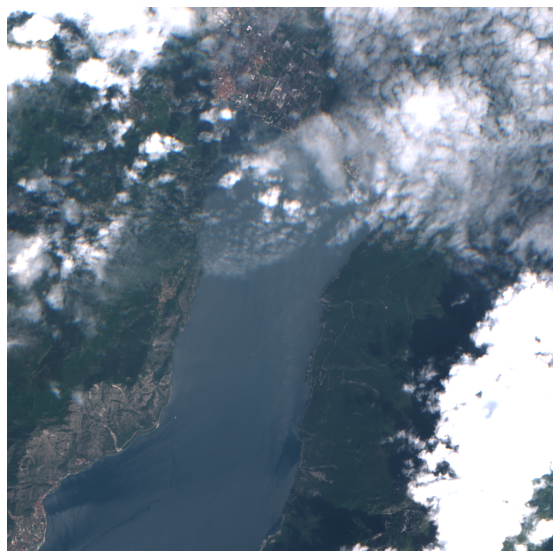

In [16]:
fig = plt.figure(figsize = (10,10))
plt.imshow(np.clip(rgb, 0.0, 1.0))
plt.axis(False)
plt.show()

## Patch extractor

It allows to store all the patches in a single vector but it requires more memory

In [23]:
patches = patch_extractor(rgb, shape=(64,64), stride = (64,64))
print(patches.shape)

(256, 64, 64, 3)


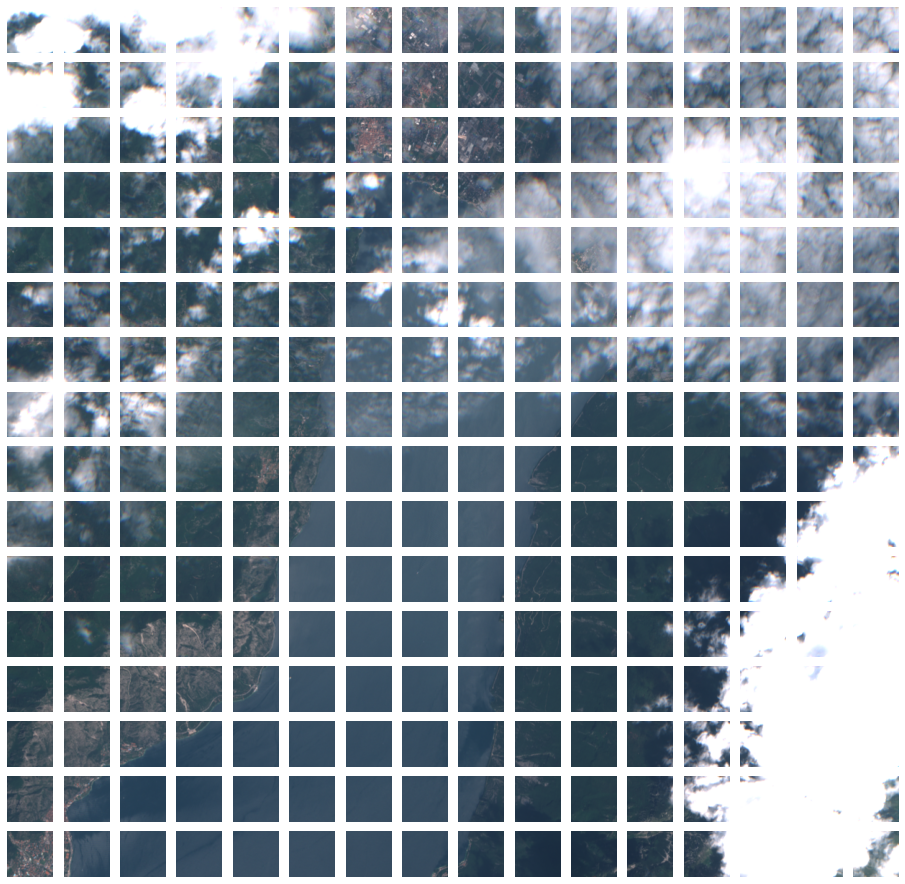

In [24]:
fig, axes = plt.subplots(nrows = 16, ncols = 16, figsize = (16,16))
ct = 0
for i in range(16):
    for j in range(16):
        axes[i,j].imshow(np.clip(patches[ct,...], 0, 1))
        axes[i,j].axis(False)
        ct+=1
plt.show()

## Parch Iterator

It allows to iterate the image axis to get the patches, it is more efficient in terms of memory usage

In [25]:
patches = iter(patch_iterator(rgb, shape=(64,64), stride = (64,64)))

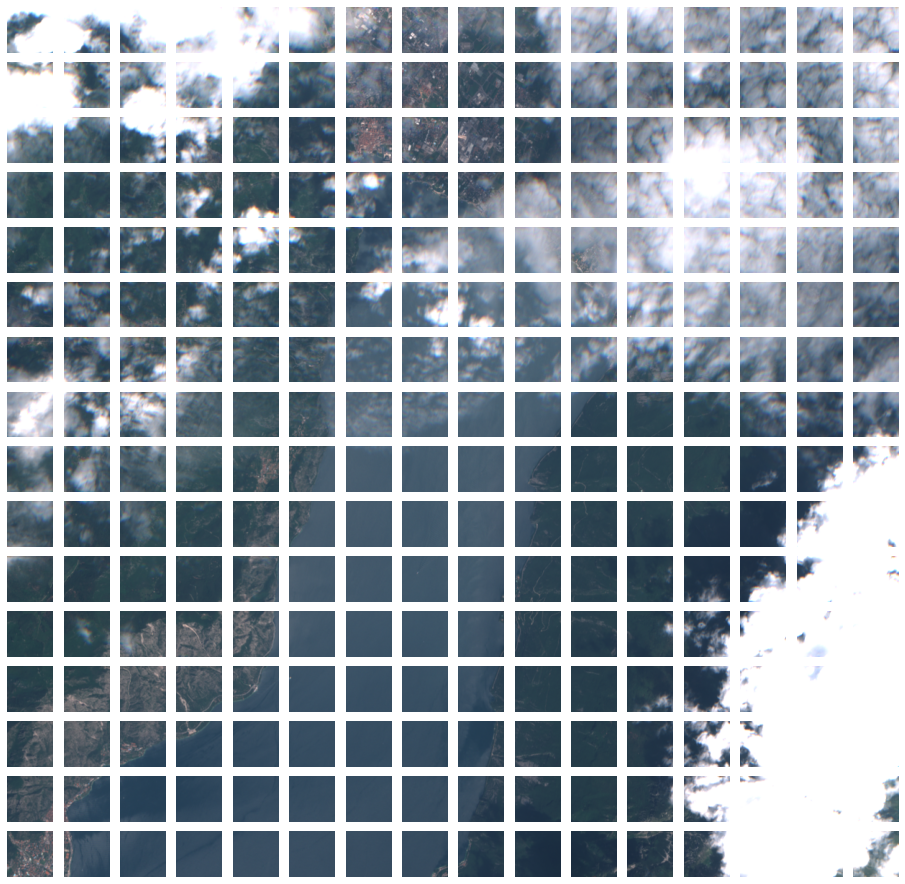

In [26]:
fig, axes = plt.subplots(nrows = 16, ncols = 16, figsize = (16,16))

for i in range(16):
    for j in range(16):
        axes[i,j].imshow(np.clip(next(patches), 0,1))
        axes[i,j].axis(False)
plt.show()       